In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_linnerud

In [167]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import all_estimators
import warnings
warnings.filterwarnings('ignore')

In [168]:
linnerud = load_linnerud()

In [169]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [170]:
linnerud.keys()

dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])

In [171]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)

In [172]:
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [173]:
df.isnull().sum()

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

<Axes: xlabel='Weight', ylabel='count'>

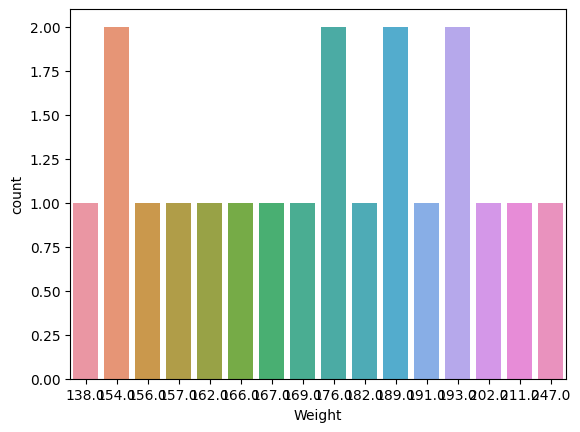

In [174]:
import seaborn as sns
sns.countplot(data=df,x="Weight")

In [180]:
X = df.drop(['Weight','Waist','Pulse'], axis=1)

In [181]:
y = df['Weight']

In [182]:
# 원-핫 인코딩
from keras.utils import to_categorical
y = to_categorical(y)

In [183]:
X.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [184]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [185]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [188]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (3,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 64)                256       
                                                                 
 dense_56 (Dense)            (None, 32)                2080      
                                                                 
 dense_57 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [189]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 0s 160ms/step - loss: 617.1590 - mse: 617.1590 - val_loss: 184.2410 - val_mse: 184.2410
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 200.5758 - mse: 200.5758 - val_loss: 63.3483 - val_mse: 63.3483
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 79.8366 - mse: 79.8366 - val_loss: 20.6692 - val_mse: 20.6692
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 30.4490 - mse: 30.4490 - val_loss: 4.7519 - val_mse: 4.7519
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5258 - mse: 10.5258 - val_loss: 0.5961 - val_mse: 0.5961
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 3.5167 - mse: 3.5167 - val_loss: 0.3854 - val_mse: 0.3854
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 1.3460 - mse: 1.3460 - val_loss: 0.9409 - val_mse: 0.9409
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0

Epoch 64/100
1/1 [==============================] - 0s 9ms/step - loss: 4.1900 - mse: 4.1900 - val_loss: 5.4222 - val_mse: 5.4222
Epoch 65/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1594 - mse: 7.1594 - val_loss: 12.6079 - val_mse: 12.6079
Epoch 66/100
1/1 [==============================] - 0s 9ms/step - loss: 7.3113 - mse: 7.3113 - val_loss: 3.6520 - val_mse: 3.6520
Epoch 67/100
1/1 [==============================] - 0s 9ms/step - loss: 5.1984 - mse: 5.1984 - val_loss: 6.1292 - val_mse: 6.1292
Epoch 68/100
1/1 [==============================] - 0s 9ms/step - loss: 2.9327 - mse: 2.9327 - val_loss: 0.8667 - val_mse: 0.8667
Epoch 69/100
1/1 [==============================] - 0s 9ms/step - loss: 1.7645 - mse: 1.7645 - val_loss: 3.1377 - val_mse: 3.1377
Epoch 70/100
1/1 [==============================] - 0s 9ms/step - loss: 1.1529 - mse: 1.1529 - val_loss: 0.3511 - val_mse: 0.3511
Epoch 71/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8811 - mse: 0

In [190]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 16ms/step - loss: 1.0659 - mse: 1.0659


In [191]:
test_mse_score

1.0658795833587646

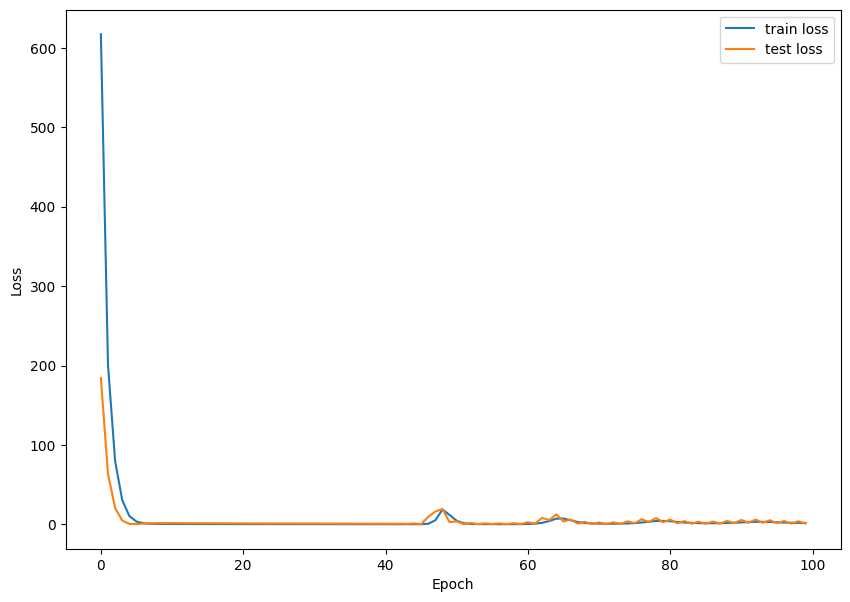

In [192]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

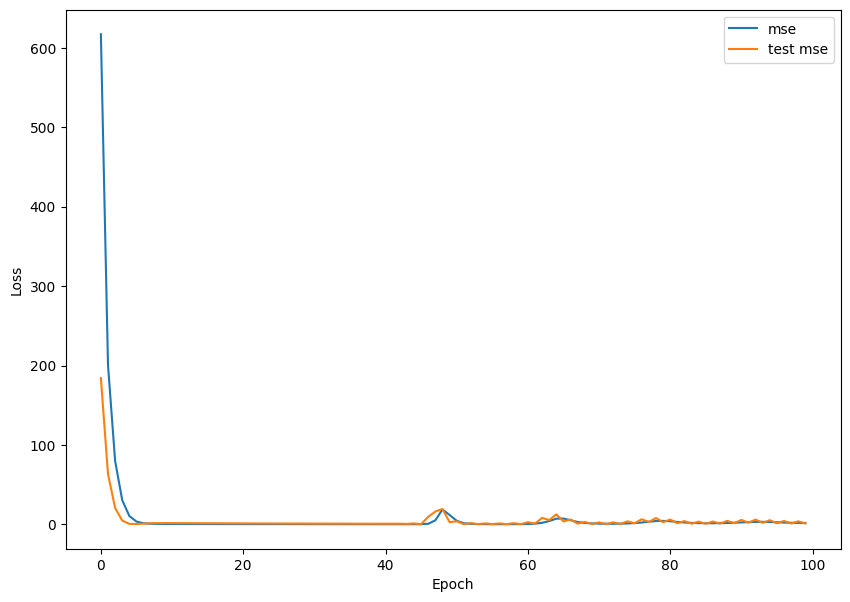

In [193]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()